In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
import pickle
from sklearn.manifold import TSNE
import pandas as pd
import random

In [61]:
for co in [0,1,2,3,4,5]:
    mse=[]
    xs=[]
    jj=[]
    for d in ['randomdata1','randomdata2','randomdata3','randomdata4','randomdata5','P123data','P124data','P125data','P126data','P127data']:  
        with open('coefficient_calibration_data/planeP123_'+str(d)+'.seqs', 'rb') as f:
            data123 = pickle.load(f)
        with open('coefficient_calibration_data/planeP124_'+str(d)+'.seqs', 'rb') as f:
            data124 = pickle.load(f)
        with open('coefficient_calibration_data/planeP125_'+str(d)+'.seqs', 'rb') as f:
            data125 = pickle.load(f)
        with open('coefficient_calibration_data/planeP126_'+str(d)+'.seqs', 'rb') as f:
            data126 = pickle.load(f)
        with open('coefficient_calibration_data/planeP127_'+str(d)+'.seqs', 'rb') as f:
            data127 = pickle.load(f)
            
        YB_P123=[[data123[i][co]] for i in range(len(data123))]
        YB_P124=[[data124[i][co]] for i in range(len(data124))]
        YB_P125=[[data125[i][co]] for i in range(len(data125))]
        YB_P126=[[data126[i][co]] for i in range(len(data126))]
        YB_P127=[[data127[i][co]] for i in range(len(data127))]
        
        model = linear_model.LinearRegression()
        model.fit(YB_P123, YB_P124)
        y_pred = model.predict(YB_P123)
        MSE = metrics.mean_squared_error(y_pred, YB_P124)
        
        mse.append(MSE)
        xs.append(model.coef_[0][0])
        jj.append(model.intercept_[0])
        
    print('应变'+str(co)+'  P123和P124的MSE:'+str(mse))
    print('应变'+str(co)+'  P123和P124的系数:'+str(xs))
    print('应变'+str(co)+'  P123和P124的截距:'+str(jj))
    print(' ')

应变0  P123和P124的MSE:[0.19734157656582504, 0.23317302210282215, 0.17410987907631736, 0.17876312937263672, 0.20998356908414895, 0.22513360428270368, 0.25150119002674287, 0.1457802207823446, 0.1689677528752873, 0.189476216993228]
应变0  P123和P124的系数:[0.6203682665675192, 0.6006976148134849, 0.5561185817320806, 0.879243927332274, 0.5968599708209503, 0.8470387242441311, 0.8902420972512538, 0.9318993113674418, 0.9361882914549264, 0.8277983742764434]
应变0  P123和P124的截距:[-0.19575382936318006, -0.20173704926880415, -0.16821113672318183, -0.12718975579967226, -0.1433704297689475, -0.028358677414055504, -0.028307915927542924, -0.04587602027222013, -0.023085612655494296, -0.04351014672852187]
 
应变1  P123和P124的MSE:[0.2951981249844171, 0.35050397292943486, 0.2181688429281458, 0.41756358636374036, 0.4373362753962333, 0.33857347073694943, 0.4850052119634556, 0.2487703585831207, 0.30950509829348327, 0.3453311615802556]
应变1  P123和P124的系数:[0.5762289346596229, 0.6797866735101508, 0.398326326595524, 0.621660152

In [63]:
for co in [0,1,2,3,4,5]:
    mse=[]
    xs=[]
    jj=[]

    with open('coefficient_calibration_data/planeP123_'+'P123data'+'.seqs', 'rb') as f:
        data123 = pickle.load(f)
    with open('coefficient_calibration_data/planeP124_'+'P123data'+'.seqs', 'rb') as f:
        data124 = pickle.load(f)
    with open('coefficient_calibration_data/planeP125_'+'P123data'+'.seqs', 'rb') as f:
        data125 = pickle.load(f)
    with open('coefficient_calibration_data/planeP126_'+'P123data'+'.seqs', 'rb') as f:
        data126 = pickle.load(f)
    with open('coefficient_calibration_data/planeP127_'+'P123data'+'.seqs', 'rb') as f:
        data127 = pickle.load(f)

    YB_P123=[[data123[i][co]] for i in range(len(data123))]
    YB_P124=[[data124[i][co]] for i in range(len(data124))]
    YB_P125=[[data125[i][co]] for i in range(len(data125))]
    YB_P126=[[data126[i][co]] for i in range(len(data126))]
    YB_P127=[[data127[i][co]] for i in range(len(data127))]
    
    data=[YB_P123,YB_P124,YB_P125,YB_P126,YB_P127]
    
    for d1 in data:
        MSE=[]
        XS=[]
        JJ=[]
        for d2 in data:
            model = linear_model.LinearRegression()
            model.fit(d1, d2)
            y_pred = model.predict(d1)
            MSE_ = metrics.mean_squared_error(y_pred, d2)
            
            MSE.append(MSE_)
            XS.append(model.coef_[0][0])
            JJ.append(model.intercept_[0])
    
        mse.append(MSE)
        xs.append(XS)
        jj.append(JJ)
    print(mse)
    print(xs)
    print(jj)


[[3.6003440056258033e-31, 0.22486674909909565, 0.24293464741758486, 0.2477528505821884, 0.24619621872124497], [0.2261039075196786, 3.571405040020179e-31, 0.298665500972605, 0.3068698166406445, 0.30605632845125474], [0.19770437436632146, 0.24172916587521184, 2.521049764530629e-32, 0.05204617364246509, 0.07543784964423834], [0.2019613884253969, 0.24878319153984355, 0.05213287475928729, 0.0, 0.059464919205176756], [0.2119780078754744, 0.2620764308054773, 0.07981268261228275, 0.06280881121316804, 8.422364024612052e-30]]
[[1.0000000000000007, 0.8476659020947664, 0.9646816724735675, 0.9605485613259439, 0.9269594003145485], [0.8523295396170734, 1.0000000000000007, 0.9311030822326731, 0.9245394315230092, 0.8888798707220934], [0.7850744574577215, 0.7536015062971314, 0.9999999999999999, 0.9728057740805779, 0.9326498991705828], [0.7830130738740003, 0.7495356597683142, 0.9744263225505445, 1.0, 0.9419478988437563], [0.7981235783422123, 0.761148985588719, 0.9867366413799203, 0.994916474148127, 0.999

In [99]:
with open('coefficient_calibration_data/planeP123_'+'randomdata1'+'.seqs', 'rb') as f:
    data123 = pickle.load(f)
with open('coefficient_calibration_data/planeP124_'+'randomdata1'+'.seqs', 'rb') as f:
    data124 = pickle.load(f)
with open('coefficient_calibration_data/planeP125_'+'randomdata1'+'.seqs', 'rb') as f:
    data125 = pickle.load(f)
with open('coefficient_calibration_data/planeP126_'+'randomdata1'+'.seqs', 'rb') as f:
    data126 = pickle.load(f)
with open('coefficient_calibration_data/planeP127_'+'randomdata1'+'.seqs', 'rb') as f:
    data127 = pickle.load(f)

YB_P123=[[data123[i][co]] for i in range(len(data123))]
YB_P124=[[data124[i][co]] for i in range(len(data124))]
YB_P125=[[data125[i][co]] for i in range(len(data125))]
YB_P126=[[data126[i][co]] for i in range(len(data126))]
YB_P127=[[data127[i][co]] for i in range(len(data127))]

In [106]:
model = linear_model.LinearRegression()
model.fit(YB_P123[:100], YB_P127[:100])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

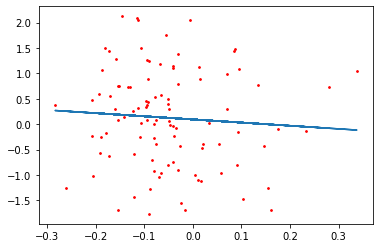

In [107]:
plt.scatter(YB_P123[:100], YB_P127[:100], 3, "red")
plt.plot(YB_P123[:100],model.predict(YB_P123[:100]))
plt.savefig('coe1_P123_P127.jpg',dpi=300)

In [110]:
with open('coefficient_calibration_data/lightGBM_linear_result.pkl', 'rb') as f:
        lightGBM_linear_result = pickle.load(f)

In [111]:
lightGBM_linear_result

{('P124', 'P123'): {'coef': [0.8514, 0.6243, 0.1649, 0.5762, -0.0019, 0.0793],
  'intercept': [0.0267, -0.0366, 0.0016, -0.001, 0.0278, 0.0011],
  'mse': [0.0224, 0.1264, 0.583, 0.1598, 0.7734, 0.6591]},
 ('P125', 'P123'): {'coef': [0.8592, 0.718, 0.5215, 0.7537, 0.0208, 0.025],
  'intercept': [0.0357, -0.0348, 0.0016, 0.0055, 0.0284, 0.0028],
  'mse': [0.0222, 0.0697, 0.2164, 0.059, 0.7265, 0.6573]},
 ('P125', 'P124'): {'coef': [0.8095, 0.5906, -0.0165, 0.5748, 0.5677, 0.7939],
  'intercept': [0.0168, -0.0279, 0.0293, 0.0321, -0.0448, 0.0105],
  'mse': [0.0389, 0.1461, 0.9768, 0.1763, 0.1424, 0.0294]},
 ('P126', 'P123'): {'coef': [0.8756, 0.6798, 0.5151, 0.7548, 0.0194, 0.0346],
  'intercept': [0.0299, -0.0473, 0.0011, 0.0048, 0.0281, 0.0026],
  'mse': [0.0163, 0.0921, 0.2276, 0.0595, 0.7237, 0.6725]},
 ('P126', 'P124'): {'coef': [0.8275, 0.5603, -0.0229, 0.5716, 0.5563, 0.7806],
  'intercept': [0.0112, -0.0381, 0.0294, 0.0317, -0.0523, 0.0115],
  'mse': [0.0302, 0.1718, 1.0128, 0.182

# 分段

In [73]:
data = pd.read_csv('../../data_per_plane/P123_data.csv', encoding='utf-8')
S = pd.read_csv('../../data_per_plane/data_std.csv', encoding='utf-8')


for d in range(5):

    center=pd.DataFrame(np.array(data.iloc[random.randint(0,1347320),1:].tolist()).reshape(1,36))

    random_DF = pd.DataFrame()
    size=100
    for i in range(size):
        random_list = []
        for i in range(36):
            random_list.append(S.iloc[0, i] * random.uniform(-0.1, 0.1) + center.iloc[0, i])
        random_df = pd.DataFrame(np.array(random_list).reshape(1, 36))
        random_DF = pd.concat([random_DF, random_df], ignore_index=True)
    if (d==0):
        X=np.asarray(random_DF.get(random_DF.columns.values.tolist()[0:30]))
    else:
        X=np.concatenate((X,np.asarray(random_DF.get(random_DF.columns.values.tolist()[0:30]))),axis=0) 
    

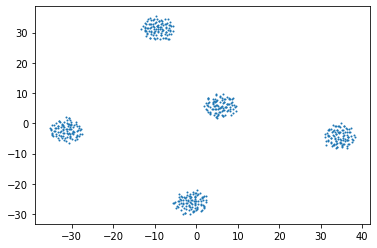

In [75]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(X)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("random_with_center",dpi=400)
plt.show()

In [8]:
for co in [1]:
    mse=[]
    xs=[]
    jj=[]
    r2=[]
    for d in range(30):  
        with open('coefficient_calibration_data/planeP123_randomdata_center'+str(d)+'.seqs', 'rb') as f:
            data123 = pickle.load(f)
        with open('coefficient_calibration_data/planeP124_randomdata_center'+str(d)+'.seqs', 'rb') as f:
            data124 = pickle.load(f)
#         with open('coefficient_calibration_data/planeP125_randomdata_center'+str(d)+'.seqs', 'rb') as f:
#             data125 = pickle.load(f)
#         with open('coefficient_calibration_data/planeP126_randomdata_center'+str(d)+'.seqs', 'rb') as f:
#             data126 = pickle.load(f)
#         with open('coefficient_calibration_data/planeP127_randomdata_center'+str(d)+'.seqs', 'rb') as f:
#             data127 = pickle.load(f)
            
        YB_P123=[[data123[i][co]] for i in range(len(data123))]
        YB_P124=[[data124[i][co]] for i in range(len(data124))]
#         YB_P125=[[data125[i][co]] for i in range(len(data125))]
#         YB_P126=[[data126[i][co]] for i in range(len(data126))]
#         YB_P127=[[data127[i][co]] for i in range(len(data127))]
        
        model = linear_model.LinearRegression()
        model.fit(YB_P123, YB_P124)
        y_pred = model.predict(YB_P123)
        MSE = metrics.mean_squared_error(y_pred, YB_P124)
        R2=metrics.r2_score(y_pred, YB_P124, multioutput= 'uniform_average')
        
        mse.append(MSE)
        r2.append(R2)
        xs.append(model.coef_[0][0])
        jj.append(model.intercept_[0])
        
    print('应变'+str(co)+'  P123和P124的MSE:'+str(mse))
    print(' ')
    print('应变'+str(co)+'  P123和P124的R2:'+str(r2))
    print(' ')
    print('应变'+str(co)+'  P123和P124的系数:'+str(xs))
    print(' ')
    print('应变'+str(co)+'  P123和P124的截距:'+str(jj))

应变1  P123和P124的MSE:[0.08476823080070517, 0.0469685609750144, 0.052805534742283805, 0.06425242150629319, 0.06985837818894834, 0.3098900479108673, 0.14989405180030974, 0.023353727569210187, 0.029528833197985417, 0.10872017498510629, 0.08138771096144234, 0.05458941456919606, 0.0699676437179719, 0.0924831212409983, 0.3154008297934019, 0.015081115738645528, 0.1968924517457021, 0.26585019237897195, 0.03511724913057392, 0.03959588258654506, 0.027190239811425338, 0.04894037280768788, 0.04902571272841039, 0.03809405341649555, 0.168190809241504, 0.04726249940194295, 0.0632616510181151, 0.0394571168971801, 0.2296844012916817, 0.03530096572625977]
 
应变1  P123和P124的R2:[-10.045485903189787, -6.921757545360032, -5.01774604122537, -9.119504391949114, -27.725995380774695, -29.138291531138666, -12.33443018378772, -2.912104275299158, -3.8385467982380277, -47.147628421822766, -37.661413195719696, -90.1900806841904, -3.934138961992378, -12654.843702471282, -72.22344569781546, -7.384636465377291, -16.717107